In [1]:

import pandas as pd
import matplotlib.pylab as plt
import warnings
from spacepy import pycdf
from spacepy.time import Ticktock
import os
import numpy as np
import pandas as pd
from spacepy import pycdf
from spacepy.time import Ticktock
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [2]:
combined_df=pd.read_hdf('combined_df_test.h5', key='df')
print('PSD=0的占比：',combined_df[combined_df['PSD']==0].shape[0]/combined_df.shape[0])
combined_df_5 = combined_df[combined_df['Interpolated_Lstar'] >= 3]
combined_df_5 = combined_df_5[combined_df['Interpolated_Lstar'] <=6]


combined_df_5_Dst_30 = combined_df_5[combined_df_5['Dst_0h'] <= -50]
combined_df_5_Dst_0 = combined_df_5[combined_df_5['Dst_0h'] >= -10]

print(combined_df_5_Dst_30['Flux'].mean()/combined_df_5_Dst_0['Flux'].mean())

PSD=0的占比： 0.33954379552806224


C:\Users\root\AppData\Local\Temp\ipykernel_113344\3353459703.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_df_5 = combined_df_5[combined_df['Interpolated_Lstar'] <=6]


3.072565612868103


In [3]:
print(combined_df.columns)

Index(['Time', 'Flux', 'Flux_Error', 'PitchAngle', 'B_Calc', 'B_Eq', 'I', 'L',
       'L_star', 'MLT',
       ...
       'Kp_150h', 'Dst_150h', 'F107_150h', 'AE_150h', 'AL_150h', 'AU_150h',
       'BZGSM_IS1_150h', 'TEMP_IS1_150h', 'PDYN_IS1_150h', 'F107_IS1_150h'],
      dtype='object', length=2432)


In [4]:
print(combined_df['Kp_1h'])

0           3
1           3
2           3
3           3
4           3
           ..
1185253    10
1185254    10
1185255    10
1185256    10
1185257    10
Name: Kp_1h, Length: 1185258, dtype: int64


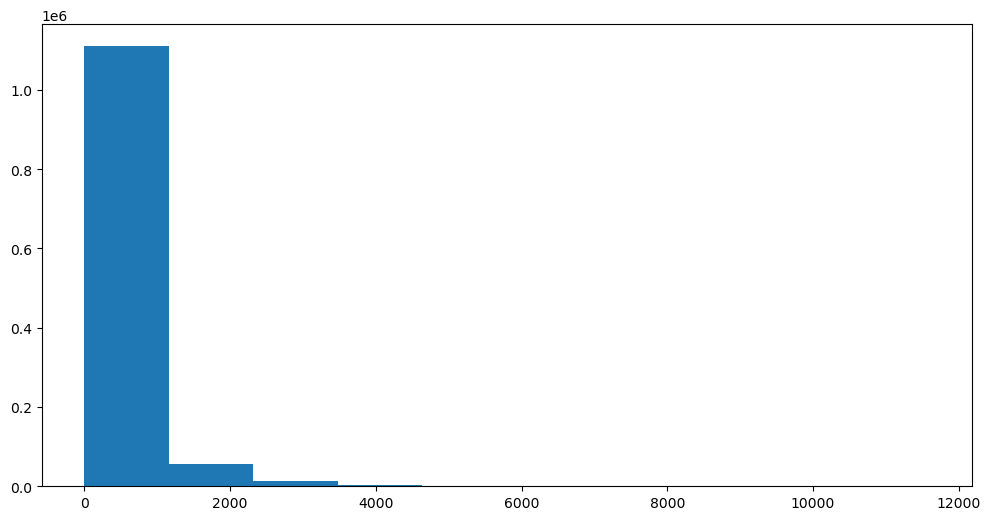

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Flux'])

plt.show()

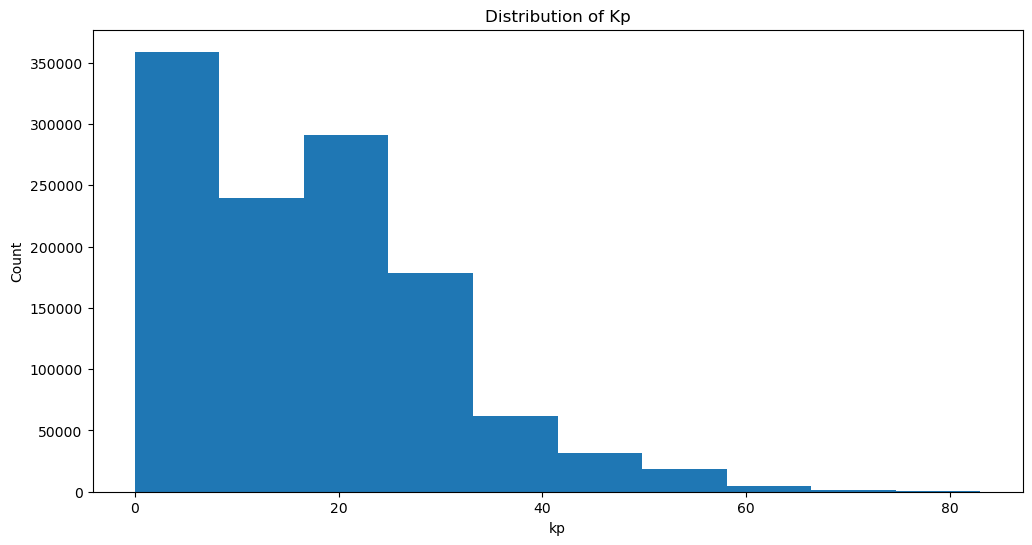

In [6]:
#画出df_with_kp['kp']分布
plt.figure(figsize=(12, 6))
plt.hist(combined_df['Kp_2h'])
plt.xlabel('kp')
plt.ylabel('Count')
plt.title('Distribution of Kp')
plt.show()

In [7]:
#检查是否有缺失值
print(combined_df.isnull().sum().tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
print(combined_df.shape)

(1185258, 2432)


In [9]:



# combined_df = combined_df.dropna()
# print(combined_df.isnull().sum().tolist())


In [10]:
print(combined_df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
print(combined_df)

                           Time        Flux  Flux_Error  PitchAngle  \
0       2012-09-12 00:06:59.994  926.009947    6.689852   73.636364   
1       2012-09-12 00:21:40.389  963.725586    6.723873  106.363636   
2       2012-09-12 00:22:38.309  991.325376    5.836914  122.727273   
3       2012-09-12 00:23:47.815  918.480164    6.883002   73.636364   
4       2012-09-12 00:24:22.568  883.084656    6.929580   73.636364   
...                         ...         ...         ...         ...   
1185253 2018-12-31 23:34:10.381    0.000000   54.590339  106.363636   
1185254 2018-12-31 23:41:11.188    0.000000   48.632790  155.454545   
1185255 2018-12-31 23:42:51.790    0.000000   72.250427    8.181818   
1185256 2018-12-31 23:44:04.483    0.000000   59.195999   73.636364   
1185257 2018-12-31 23:58:06.919    0.000000   50.912613  106.363636   

              B_Calc         B_Eq         I         L    L_star        MLT  \
0         269.370765   199.288854  1.102150  5.294291  4.852171   9.0

In [12]:
print(combined_df)

                           Time        Flux  Flux_Error  PitchAngle  \
0       2012-09-12 00:06:59.994  926.009947    6.689852   73.636364   
1       2012-09-12 00:21:40.389  963.725586    6.723873  106.363636   
2       2012-09-12 00:22:38.309  991.325376    5.836914  122.727273   
3       2012-09-12 00:23:47.815  918.480164    6.883002   73.636364   
4       2012-09-12 00:24:22.568  883.084656    6.929580   73.636364   
...                         ...         ...         ...         ...   
1185253 2018-12-31 23:34:10.381    0.000000   54.590339  106.363636   
1185254 2018-12-31 23:41:11.188    0.000000   48.632790  155.454545   
1185255 2018-12-31 23:42:51.790    0.000000   72.250427    8.181818   
1185256 2018-12-31 23:44:04.483    0.000000   59.195999   73.636364   
1185257 2018-12-31 23:58:06.919    0.000000   50.912613  106.363636   

              B_Calc         B_Eq         I         L    L_star        MLT  \
0         269.370765   199.288854  1.102150  5.294291  4.852171   9.0

In [13]:
columns_list = combined_df.columns.tolist()
print(columns_list)


['Time', 'Flux', 'Flux_Error', 'PitchAngle', 'B_Calc', 'B_Eq', 'I', 'L', 'L_star', 'MLT', 'X', 'Y', 'Z', 'Interpolated_Lstar', 'u', 'PSD', 'VX_0h', 'SYMH_0h', 'VX_IS1_0h', 'BZGSM_0h', 'TEMP_0h', 'PDYN_0h', 'Kp_0h', 'Dst_0h', 'F107_0h', 'AE_0h', 'AL_0h', 'AU_0h', 'BZGSM_IS1_0h', 'TEMP_IS1_0h', 'PDYN_IS1_0h', 'F107_IS1_0h', 'VX_1h', 'SYMH_1h', 'VX_IS1_1h', 'BZGSM_1h', 'TEMP_1h', 'PDYN_1h', 'Kp_1h', 'Dst_1h', 'F107_1h', 'AE_1h', 'AL_1h', 'AU_1h', 'BZGSM_IS1_1h', 'TEMP_IS1_1h', 'PDYN_IS1_1h', 'F107_IS1_1h', 'VX_2h', 'SYMH_2h', 'VX_IS1_2h', 'BZGSM_2h', 'TEMP_2h', 'PDYN_2h', 'Kp_2h', 'Dst_2h', 'F107_2h', 'AE_2h', 'AL_2h', 'AU_2h', 'BZGSM_IS1_2h', 'TEMP_IS1_2h', 'PDYN_IS1_2h', 'F107_IS1_2h', 'VX_3h', 'SYMH_3h', 'VX_IS1_3h', 'BZGSM_3h', 'TEMP_3h', 'PDYN_3h', 'Kp_3h', 'Dst_3h', 'F107_3h', 'AE_3h', 'AL_3h', 'AU_3h', 'BZGSM_IS1_3h', 'TEMP_IS1_3h', 'PDYN_IS1_3h', 'F107_IS1_3h', 'VX_4h', 'SYMH_4h', 'VX_IS1_4h', 'BZGSM_4h', 'TEMP_4h', 'PDYN_4h', 'Kp_4h', 'Dst_4h', 'F107_4h', 'AE_4h', 'AL_4h', 'AU_4h

In [14]:
time_steps=150
VX_time1 = [f'VX_{i}h' for i in range(0, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(0, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(0, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(0, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(0, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(0, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(0, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(0, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(0, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(0, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(0, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(0, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(0, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(0, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(0, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(0, time_steps + 1)]


In [15]:
print(VX_time1)

['VX_0h', 'VX_1h', 'VX_2h', 'VX_3h', 'VX_4h', 'VX_5h', 'VX_6h', 'VX_7h', 'VX_8h', 'VX_9h', 'VX_10h', 'VX_11h', 'VX_12h', 'VX_13h', 'VX_14h', 'VX_15h', 'VX_16h', 'VX_17h', 'VX_18h', 'VX_19h', 'VX_20h', 'VX_21h', 'VX_22h', 'VX_23h', 'VX_24h', 'VX_25h', 'VX_26h', 'VX_27h', 'VX_28h', 'VX_29h', 'VX_30h', 'VX_31h', 'VX_32h', 'VX_33h', 'VX_34h', 'VX_35h', 'VX_36h', 'VX_37h', 'VX_38h', 'VX_39h', 'VX_40h', 'VX_41h', 'VX_42h', 'VX_43h', 'VX_44h', 'VX_45h', 'VX_46h', 'VX_47h', 'VX_48h', 'VX_49h', 'VX_50h', 'VX_51h', 'VX_52h', 'VX_53h', 'VX_54h', 'VX_55h', 'VX_56h', 'VX_57h', 'VX_58h', 'VX_59h', 'VX_60h', 'VX_61h', 'VX_62h', 'VX_63h', 'VX_64h', 'VX_65h', 'VX_66h', 'VX_67h', 'VX_68h', 'VX_69h', 'VX_70h', 'VX_71h', 'VX_72h', 'VX_73h', 'VX_74h', 'VX_75h', 'VX_76h', 'VX_77h', 'VX_78h', 'VX_79h', 'VX_80h', 'VX_81h', 'VX_82h', 'VX_83h', 'VX_84h', 'VX_85h', 'VX_86h', 'VX_87h', 'VX_88h', 'VX_89h', 'VX_90h', 'VX_91h', 'VX_92h', 'VX_93h', 'VX_94h', 'VX_95h', 'VX_96h', 'VX_97h', 'VX_98h', 'VX_99h', 'VX_100h'

In [16]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
X_time7 = combined_df[Kp_time7].values
X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time5,X_time6,X_time7,X_time8,X_time9,X_time10,X_time11,X_time12,X_time13,X_time14,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = ['I',  'MLT','Interpolated_Lstar', 'u']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y = np.log10(combined_df['PSD'].values+5e-8 ) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(1185258, 151, 16)


In [17]:
del combined_df

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [19]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 151  # 根据您的数据调整
num_features = 16  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)

In [20]:

X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)


scaler_target = MinMaxScaler()

y_scaled = scaler_target.fit_transform(y)

import joblib
joblib.dump(scaler_target, 'scaler_target.pkl')
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')

# 在其他地方加载 scaler 并使用
# scaler_target = joblib.load('scaler_target.pkl')

# 归一化 Flux_Error
scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.2
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [21]:
print(X_non_time[:,2].min(), X_non_time[:,2].max())
original_value = 2.6

# 使用 scaler_non_time 转换原始值为标准化后的值
scaled_value = scaler_non_time.transform([[0, 0, original_value, 0]])

L_YZ=scaled_value[0,2]
print(L_YZ)

-2.3824044769181 1.7499920201263297
-1.2341268219208623


In [22]:
X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.1, random_state=42
)

In [23]:



time_series_input = Input(shape=(time_steps, num_features), name='time_series_input')
lstm_out = LSTM(256, activation='tanh')(time_series_input)
print(lstm_out.shape)

# 非时间序列输入：3个特征
non_time_series_input = Input(shape=(X_non_time_train.shape[1],), name='non_time_series_input')

# 拼接 LSTM 输出和非时间序列输入
concatenated = Concatenate()([lstm_out, non_time_series_input])

# 全连接层
dense1 = Dense(128, activation='relu')(concatenated)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)  # 根据任务调整输出层

# 构建模型
model = Model(inputs=[time_series_input, non_time_series_input], outputs=output)

# 编译模型
model.compile(optimizer='adam',
              loss='mean_squared_error',  # 根据任务调整损失函数
              metrics=['mae'])

# 模型概述
model.summary()






(None, 256)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_series_input (InputLayer)  [(None, 151, 16)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 256)          279552      ['time_series_input[0][0]']      
                                                                                                  
 non_time_series_input (InputLa  [(None, 4)]         0           []                               
 yer)                                                                                             
                                                                                                  
 concatenate (Concatenate)      (None, 260)          0           ['lstm[0][0]',   

In [24]:
history = model.fit(
    [X_time_train, X_non_time_train],  # 输入
    y_train,
    epochs=200,  # 设置较大的 epoch，早停会提前终止
    batch_size=256,
    validation_data=([X_time_val, X_non_time_val], y_val),
    sample_weight=weight_train.flatten()
)

Epoch 1/200
4167/4167 [==============================] - 42s 9ms/step - loss: 0.0206 - mae: 0.0966 - val_loss: 0.0112 - val_mae: 0.0665
Epoch 2/200
4167/4167 [==============================] - 38s 9ms/step - loss: 0.0098 - mae: 0.0615 - val_loss: 0.0085 - val_mae: 0.0556
Epoch 3/200
4167/4167 [==============================] - 39s 9ms/step - loss: 0.0076 - mae: 0.0521 - val_loss: 0.0071 - val_mae: 0.0482
Epoch 4/200
4167/4167 [==============================] - 38s 9ms/step - loss: 0.0065 - mae: 0.0471 - val_loss: 0.0065 - val_mae: 0.0460
Epoch 5/200
4167/4167 [==============================] - 39s 9ms/step - loss: 0.0060 - mae: 0.0442 - val_loss: 0.0060 - val_mae: 0.0435
Epoch 6/200
4167/4167 [==============================] - 39s 9ms/step - loss: 0.0057 - mae: 0.0425 - val_loss: 0.0055 - val_mae: 0.0405
Epoch 7/200
4167/4167 [==============================] - 39s 9ms/step - loss: 0.0054 - mae: 0.0411 - val_loss: 0.0055 - val_mae: 0.0407
Epoch 8/200
4167/4167 [=========================

In [25]:
y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_val_original = scaler_target.inverse_transform(y_val)

3704/3704 [==============================] - 10s 3ms/step


测试集上的 RMSE: 0.25565085782651525 测试集上的 R2: 0.9386873663164228


d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from current font.
  fig.canvas

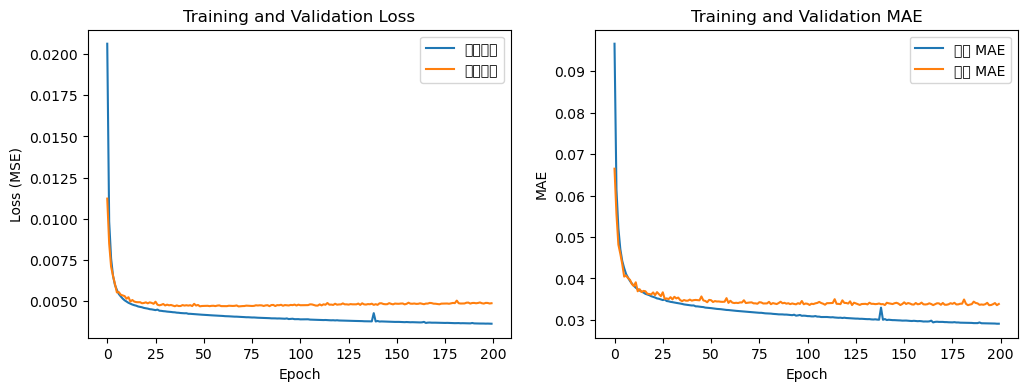

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
r2 = r2_score(y_val_original, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')


# 15. 可视化训练过程
import matplotlib.pyplot as plt

# 绘制训练和验证的损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')

# 绘制训练和验证的 MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='训练 MAE')
plt.plot(history.history['val_mae'], label='验证 MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')

plt.show()

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [28]:
#保存模型

model.save('M75_7_model.h5')
#读取模型
#model = keras.models.load_model('LOW2_model.h5')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


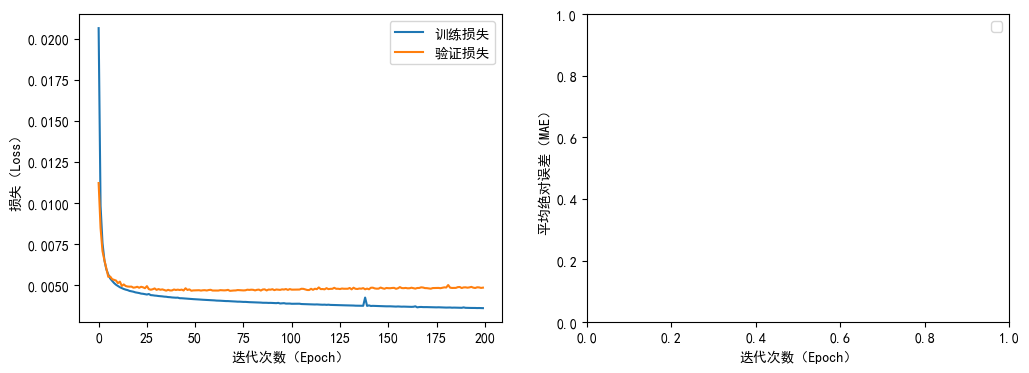

In [29]:
import matplotlib.pyplot as plt
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制训练和验证损失曲线
plt.figure(figsize=(12, 4))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('迭代次数（Epoch）')
plt.ylabel('损失（Loss）')
plt.legend()

# MAE 曲线
plt.subplot(1, 2, 2)
# plt.plot(history.history['mse'], label='训练 MAE')
# plt.plot(history.history['val_mse'], label='验证 MAE')
plt.xlabel('迭代次数（Epoch）')
plt.ylabel('平均绝对误差（MAE）')
plt.legend()

plt.show()


3109/3109 [==============================] - 8s 3ms/step
测试集上的 RMSE: 0.2289467098469422 测试集上的 R2: 0.9454601289827849


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


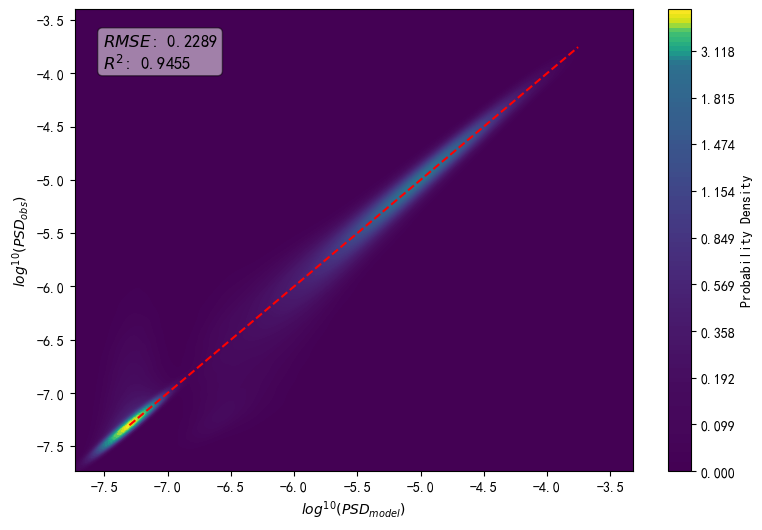

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 显示负号
plt.rcParams['axes.unicode_minus'] = False

mask = X_non_time_val[:,2] < L_YZ
X_non_time_val_out = X_non_time_val[~mask]
X_time_val_out = X_time_val[~mask]
y_val_out = y_val[~mask]

y_pred_scaled = model.predict([X_time_val_out, X_non_time_val_out])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val_out)
# 生成布尔掩码
# mask_pred = y_pred >= -8
# mask_test = y_test_subset >= -8

# # 组合掩码，确保两者都满足条件
# combined_mask = mask_pred & mask_test

# # 使用组合掩码过滤 y_pred 和 y_test_subset
# y_pred_filtered = y_pred[combined_mask]
# y_test_filtered = y_test_subset[combined_mask]

# 将对数值还原（如果需要）
# y_test_exp = y_test_filtered
# y_pred_exp = y_pred_filtered

y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')

# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections


if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density')

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-10, -6)
# plt.ylim(-10, -6)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$')
plt.ylabel('$log^{10}(PSD_{obs})$')
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()
